In [1]:
#INTERACTIVE: Timeline using timevis package

library(readxl) # For reading excel sheets into R
library(timevis) # The package in question for creating custom timelines
library(tidyverse) # For easy data cleaning and manipulation in R
library(pander) # For creating nice-looking formatting in this markdown document
library(skimr)
library(knitr)
library(ggplot2)
library(DataExplorer)
library(ggcorrplot)
library(forcats)
library(dbscan)
library(factoextra)
library(fpc)
library(dplyr)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: 'fpc'


The following object is masked from 'package:dbscan':

    dbscan




<font color=red><H2> NEED TO FIGURE OUT SPACE ADDED WHTN BRING TWO STRINGS TOGETHER INTO ONE VARIABLE <BR><br>
Want the same feel as initial python script

In [2]:
### Temp solution
filepath <- 'D:\\School\\Missouri PSDS\\PSDS 4900\\Data\\output_datasets\\2018-03-27-2021-04-05_FORMATTED.csv'
filepath

[1] "D:\\School\\Missouri PSDS\\PSDS 4900\\Data\\output_datasets\\2018-03-27-2021-04-05_FORMATTED.csv"

In [3]:
df <- read_csv(filepath) # Read in the data
head(df)


nrow(df) # The dataset has 680212 rows


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_character(),
  DATA_ID = col_double(),
  ISO = col_double(),
  EVENT_ID_NO_CNTY = col_double(),
  YEAR = col_double(),
  TIME_PRECISION = col_double(),
  INTER1 = col_double(),
  INTER2 = col_double(),
  INTERACTION = col_double(),
  LATITUDE = col_double(),
  LONGITUDE = col_double(),
  GEO_PRECISION = col_double(),
  FATALITIES = col_double(),
  TIMESTAMP = col_double()
)
i Use `spec()` for the full column specifications.




DATA_ID,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP,ISO3
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,...,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
7767296,32,ARG7124,7124,26 March 2021,2021,1,Protests,Peaceful protest,Protesters (Argentina),...,San Carlos de Bariloche,-41.1335,-71.3103,1,El Cordillerano,Subnational,"On 26 March 2021, in San Carlos de Bariloche (Rio Negro), the Association of Health Workers (ATSA) led a protest in solidarity with workers of the San Carlos Sanatorium and the Regional Private Hospital demanding a salary readjustment of 16%. [size=no report]",0,1617033264,ARG
7767808,887,YEM63695,63695,26 March 2021,2021,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Al Kasarah,15.5381,45.1357,2,Al Masdar; Nukhba Hadramawt,National,"On 26 March 2021, pro-Hadi and Houthi forces clashed northwest of Marib City in the Al Jawf governorate, coded at Kasarah front (Sirwah, Marib), resulting in the death of the commander for the Sixth Military Region in the pro-Hadi army. It is unclear if there were other fatalities.",1,1617039259,YEM
7768064,222,SLV2499,2499,26 March 2021,2021,1,Battles,Armed clash,MS-13: Mara Salvatrucha,...,San Rafael Cedros,13.7333,-88.8833,2,El Salvador.com,National,"On 26 March 2021, in San Rafael Cedros municipality, Cuscatlan, there was an armed clash in the Cerro Colorado canton. According to reports, gang members ambushed police officers, who retaliated. Two bystanders were injured in the crossfire between gang members and police officers. One alleged head of MS-13 was shot and killed. 2 injured, 1 fatality.",1,1617047503,SLV
7787008,642,ROU1529,1529,26 March 2021,2021,1,Protests,Peaceful protest,Protesters (Romania),...,Targu Mures,46.5500,24.5667,1,Adevarul,National,"On 26 March 2021, cultural workers and artists protested in Targu Mures, demanding government support for their sector. [size=no report]",0,1617121993,ROM
7788032,756,CHE198,198,26 March 2021,2021,1,Protests,Peaceful protest,Protesters (Switzerland),...,Lausanne,46.5197,6.6323,1,24 Heures,National,"On 26 March 2021, about 1,500 people, among them environmental activists, marched through the streets of Lausanne (Lausanne, Vaud) to express their solidarity with the occupation of the Mormont hill by ZAD environmental activists and denounce the announced project to extend the cement quarry located in the area. Protesters also demand greater environmental efforts from public authorities. [size=about 1500]",0,1617132585,CHE
7788288,380,ITA7474,7474,26 March 2021,2021,1,Protests,Peaceful protest,Protesters (Italy),...,Torri di Quartesolo,45.5232,11.6085,1,Global Project,National,"On 26 March 2021, people working in the logistics sector gathered outside the DHL warehouse in Torri di Quartesolo (Vicenza, Veneto) to demonstrate against their working conditions. They demanded a higher salary and a safer health protocol. [size=no report]",0,1617132586,ITA


[1] 680212

In [4]:
summary(df)

    DATA_ID             ISO        EVENT_ID_CNTY      EVENT_ID_NO_CNTY
 Min.   :4554781   Min.   :  0.0   Length:680212      Min.   :    1   
 1st Qu.:6699570   1st Qu.:188.0   Class :character   1st Qu.: 4217   
 Median :7223036   Median :410.0   Mode  :character   Median :13636   
 Mean   :6996303   Mean   :455.2                      Mean   :23076   
 3rd Qu.:7542442   3rd Qu.:760.0                      3rd Qu.:37860   
 Max.   :7790185   Max.   :894.0                      Max.   :91826   
  EVENT_DATE             YEAR      TIME_PRECISION   EVENT_TYPE       
 Length:680212      Min.   :2018   Min.   :1.000   Length:680212     
 Class :character   1st Qu.:2019   1st Qu.:1.000   Class :character  
 Mode  :character   Median :2019   Median :1.000   Mode  :character  
                    Mean   :2019   Mean   :1.075                     
                    3rd Qu.:2020   3rd Qu.:1.000                     
                    Max.   :2021   Max.   :3.000                     
 SUB_EVENT_TY

<H3><font color=blue> Columns (Attributes) = 31 <br>
    Rows (Records) = 680212</font>

In [5]:
spec(df)

cols(
  DATA_ID = col_double(),
  ISO = col_double(),
  EVENT_ID_CNTY = col_character(),
  EVENT_ID_NO_CNTY = col_double(),
  EVENT_DATE = col_character(),
  YEAR = col_double(),
  TIME_PRECISION = col_double(),
  EVENT_TYPE = col_character(),
  SUB_EVENT_TYPE = col_character(),
  ACTOR1 = col_character(),
  ASSOC_ACTOR_1 = col_character(),
  INTER1 = col_double(),
  ACTOR2 = col_character(),
  ASSOC_ACTOR_2 = col_character(),
  INTER2 = col_double(),
  INTERACTION = col_double(),
  REGION = col_character(),
  COUNTRY = col_character(),
  ADMIN1 = col_character(),
  ADMIN2 = col_character(),
  ADMIN3 = col_character(),
  LOCATION = col_character(),
  LATITUDE = col_double(),
  LONGITUDE = col_double(),
  GEO_PRECISION = col_double(),
  SOURCE = col_character(),
  SOURCE_SCALE = col_character(),
  NOTES = col_character(),
  FATALITIES = col_double(),
  TIMESTAMP = col_double(),
  ISO3 = col_character()
)

<H3> <font color=blue>Datatypes are either doubles or characters</font>
<H3><font color=red>Need to change date value to a datetime type</font>

In [6]:
str(df)

spec_tbl_df[,31] [680,212 x 31] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ DATA_ID         : num [1:680212] 7767296 7767808 7768064 7787008 7788032 ...
 $ ISO             : num [1:680212] 32 887 222 642 756 380 380 356 887 642 ...
 $ EVENT_ID_CNTY   : chr [1:680212] "ARG7124" "YEM63695" "SLV2499" "ROU1529" ...
 $ EVENT_ID_NO_CNTY: num [1:680212] 7124 63695 2499 1529 198 ...
 $ EVENT_DATE      : chr [1:680212] "26 March 2021" "26 March 2021" "26 March 2021" "26 March 2021" ...
 $ YEAR            : num [1:680212] 2021 2021 2021 2021 2021 ...
 $ TIME_PRECISION  : num [1:680212] 1 1 1 1 1 1 1 1 1 1 ...
 $ EVENT_TYPE      : chr [1:680212] "Protests" "Battles" "Battles" "Protests" ...
 $ SUB_EVENT_TYPE  : chr [1:680212] "Peaceful protest" "Armed clash" "Armed clash" "Peaceful protest" ...
 $ ACTOR1          : chr [1:680212] "Protesters (Argentina)" "Military Forces of Yemen (2012-)" "MS-13: Mara Salvatrucha" "Protesters (Romania)" ...
 $ ASSOC_ACTOR_1   : chr [1:680212] "Health Workers (Arge

In [7]:
skimdf <- skim(df)

skimdf

-- Data Summary ------------------------
                           Values
Name                       df    
Number of rows             680212
Number of columns          31    
_______________________          
Column type frequency:           
  character                18    
  numeric                  13    
________________________         
Group variables            None  

-- Variable type: character ----------------------------------------------------
# A tibble: 18 x 8
   skim_variable  n_missing complete_rate   min   max empty n_unique whitespace
 * <chr>              <int>         <dbl> <int> <int> <int>    <int>      <int>
 1 EVENT_ID_CNTY          0         1         4     8     0   680212          0
 2 EVENT_DATE             0         1        11    17     0     1096          0
 3 EVENT_TYPE             0         1         5    26     0        6          0
 4 SUB_EVENT_TYPE         0         1         5    35     0       25          0
 5 ACTOR1                 0         1 

<H3><font color=red>Histograms are not showing in Jupyter notebook, but shows in RStudio </font><br>
    
<i><font color=green> Condition for missing data in the following columns:<br>
    columns (6:8, 12:13) <br>
    ASSOC_ACTOR_1, ACTOR_2, ASSOC_ACTOR_2, ADMIN2, ADMIN3 <BR></i>
    
    
<font color=blue> ISO3 column value has a value of 190 = number of countries <br>
    <i> RUN A CLUSTERING SCRIPT TO IDENTIFY THE TOP COUNTRIES?<BR>
        
COUNTRY column has a value of 194.  <I> WHAT IS THE DIFFERENCE?
    
    

    

    
    

<H1><font color=blue> RSTUDIO RESULTS BELOW

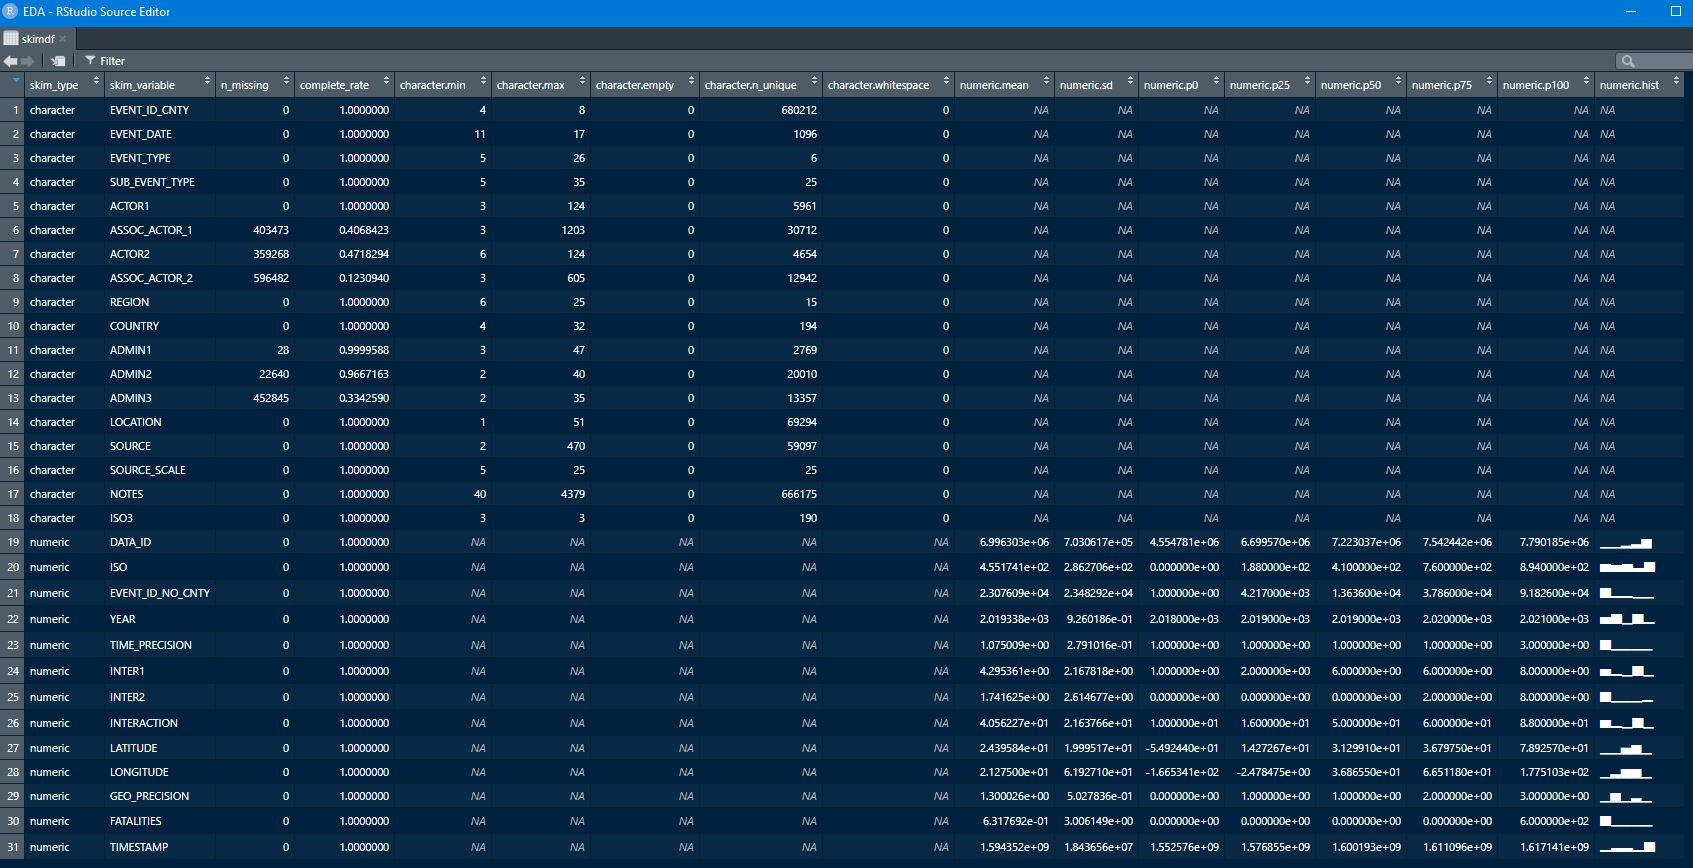

In [8]:
#UNIQUE VALUES FOR EVENT_TYPES
#SKIM IDENTIFIED 6 VALUES; WHAT ARE THEY?

event_type_values <- as.data.frame(with (df, table(EVENT_TYPE)))
event_type_values

EVENT_TYPE,Freq
<fct>,<int>
Battles,127539
Explosions/Remote violence,89572
Protests,316136
Riots,43673
Strategic developments,30944
Violence against civilians,72348


In [9]:
#IDENTIFY REGION VALUES
#SKIM IDENTIFIED 15 VALUES; WHAT ARE THEY?

region_values <- as.data.frame(with (df, table(REGION)))
region_values

REGION,Freq
<fct>,<int>
Caribbean,4689
Caucasus and Central Asia,60415
Central America,11963
East Asia,30546
Eastern Africa,19728
Europe,99624
Middle Africa,13794
Middle East,138980
North America,67566


In [10]:
#IDENTIFY SUB_EVENT_TYPE
#SKIM IDENTIFIED 25 VALUES; WHAT ARE THEY?

sub_event_values <- as.data.frame(with(df, table(SUB_EVENT_TYPE)))
sub_event_values

SUB_EVENT_TYPE,Freq
<fct>,<int>
Abduction/forced disappearance,6653
Agreement,840
Air/drone strike,23082
Armed clash,123040
Arrests,3552
Attack,64646
Change to group/activity,7179
Chemical weapon,6
Disrupted weapons use,3853


<font color=blue> <H2> Maybe focus on top regions and countries within that region, and compare against lowest region and countries within that region? <br>
    
<font color=blue>Compare event types?

In [11]:
#IDENTIFY SOURCE_SCALE
#SKIM IDENTIFIED 25 VALUES; WHAT ARE THEY?

source_scale_values <- as.data.frame(with(df, table(SOURCE_SCALE)))
source_scale_values

SOURCE_SCALE,Freq
<fct>,<int>
International,13801
Local partner-National,27249
Local partner-New media,17650
Local partner-Other,20111
Local partner-Regional,789
National,304428
National-International,4809
National-Regional,3632
New media,28153


<H3> <font color=blue> Which value has the most fidelity?<br>
    
<i><font color = green> Identify differences in the ACLED manual

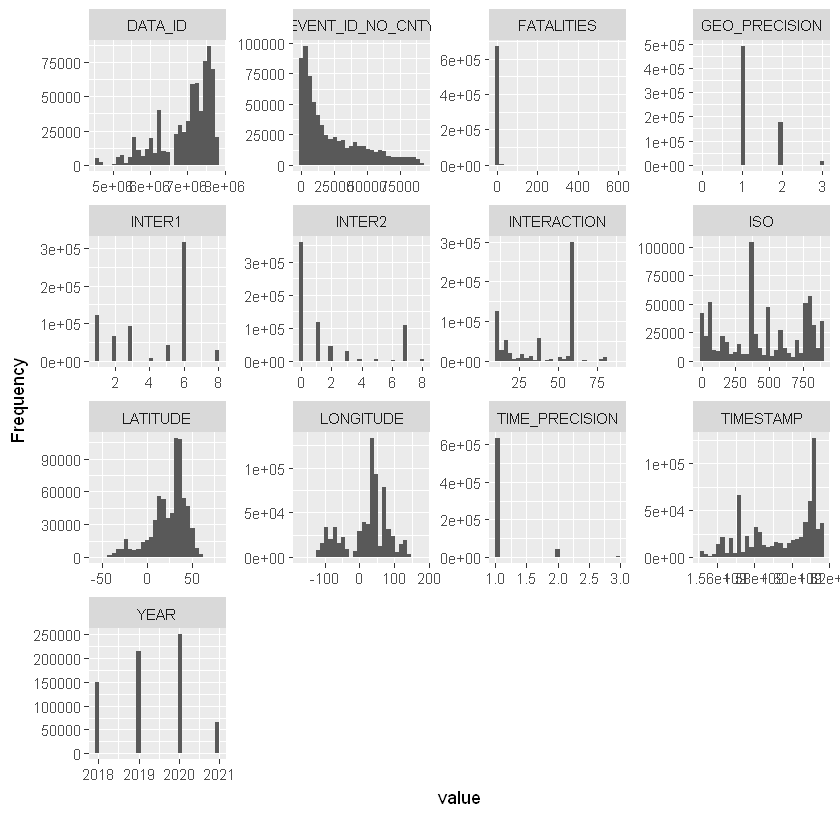

In [12]:
plot_histogram(df)

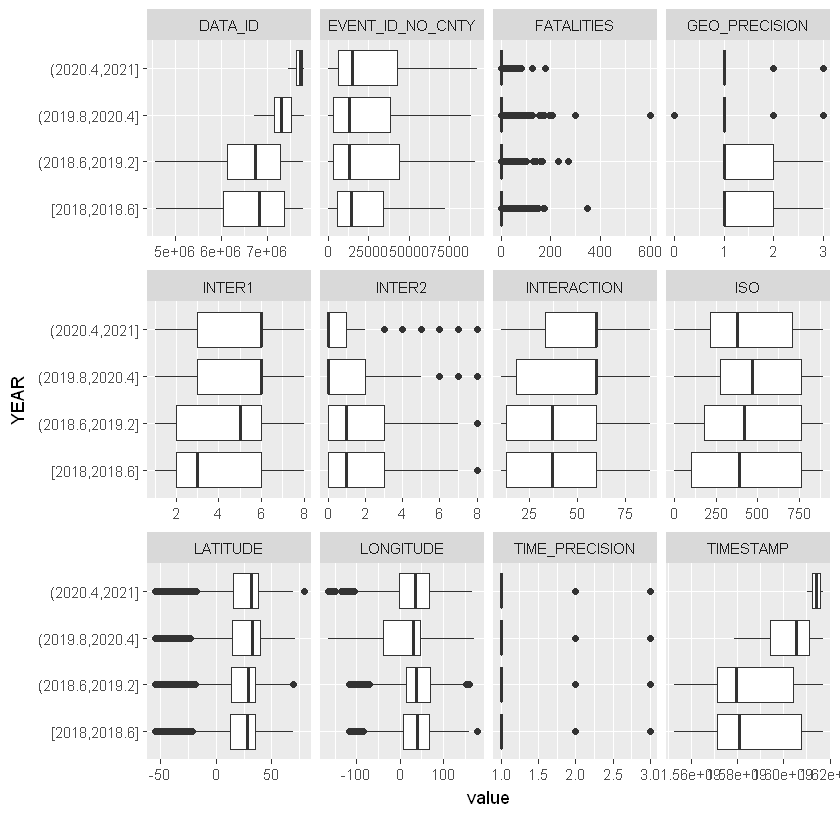

In [13]:
plot_boxplot(df, by = "YEAR")

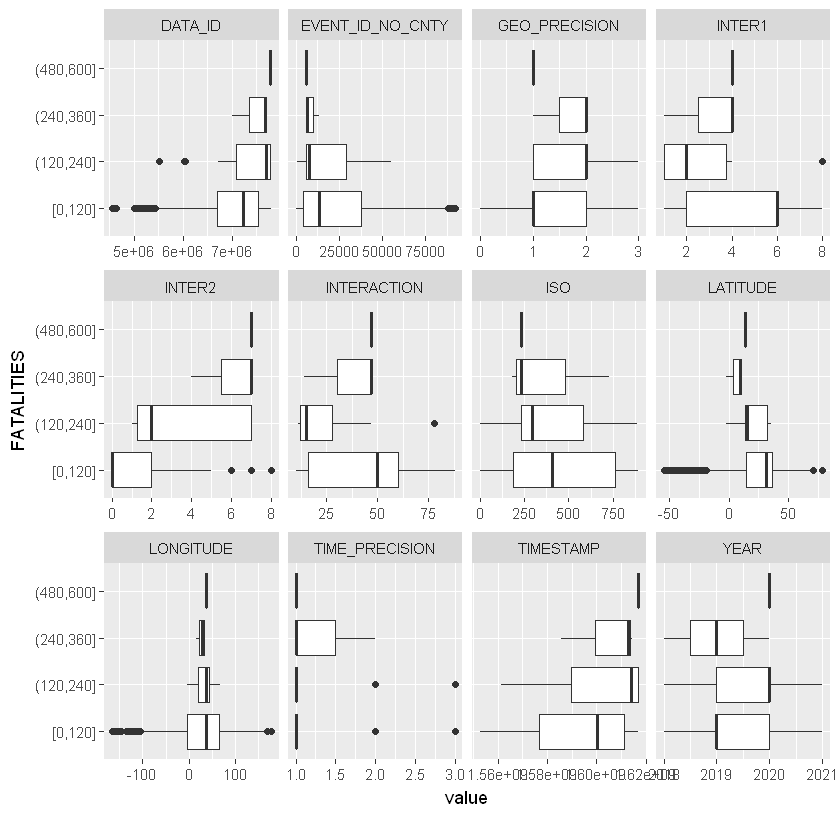

In [14]:
plot_boxplot(df, by="FATALITIES")

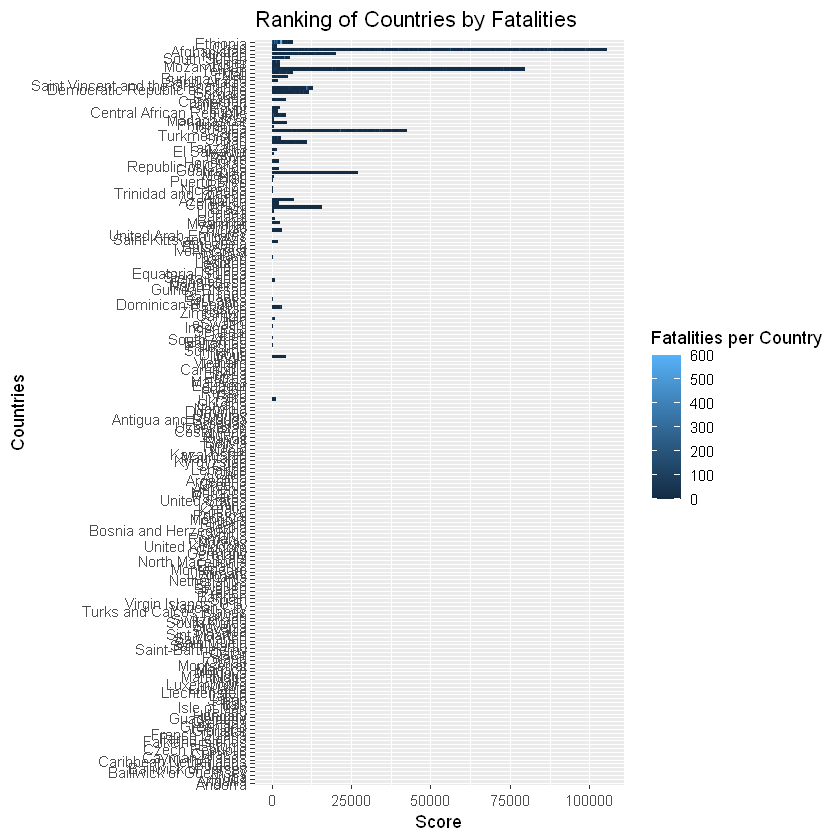

In [15]:
#BARPLOT TO BETTER SEE RANKING OF COUNTRIES COMPARED TO FATALITIES

df %>%
    mutate (COUNTRY = fct_reorder(COUNTRY, FATALITIES)) %>%
    ggplot(aes(x=reorder(COUNTRY, FATALITIES), y=FATALITIES)) + 
      geom_bar(stat ='identity',aes(fill=FATALITIES))+
      coord_flip() + 
      xlab("") +
      scale_fill_gradient(name="Fatalities per Country")+
      labs(title = 'Ranking of Countries by Fatalities', y='Score',x='Countries')
      #geom_hline(yintercept = mean(df$FATALITIES),size = 1, color = 'blue')



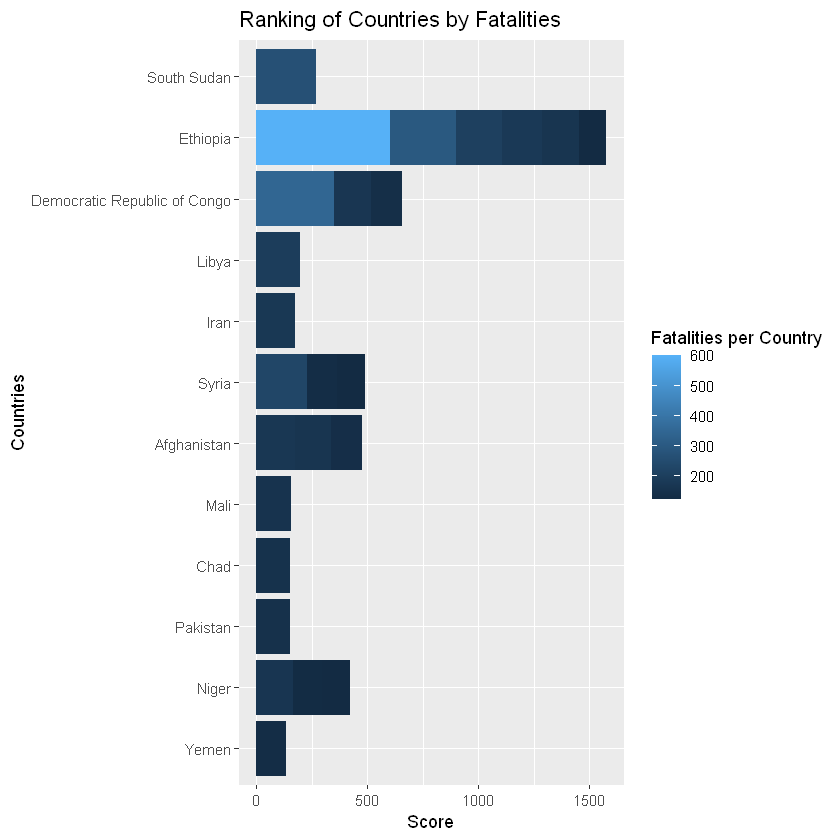

In [16]:
df %>%
    arrange (desc(FATALITIES)) %>%
    slice(1:25) %>%
    ggplot(aes(x=reorder(COUNTRY, FATALITIES), y=FATALITIES)) + 
      geom_bar(stat ='identity',aes(fill=FATALITIES))+
      coord_flip() + 
      xlab("") +
      scale_fill_gradient(name="Fatalities per Country")+
      labs(title = 'Ranking of Countries by Fatalities', y='Score',x='Countries')

<H2><font color=blue> Requested top 25 countires w/ fatalities, but only got 12.  According to the summary of the data the max value of fataliies for a record is 600<BR>
    
Group records per country by event type? <br>
<font color=green><i> do a group of data of some type

In [17]:
#CREATE SUBSET OF ATTRIBUTES WITH NUMERIC VALUES

dflist_filtered_numeric <- unlist(lapply(df, is.numeric))
dflist_filtered_numeric

df_numeric <- df[ , dflist_filtered_numeric]
head(df_numeric)

DATA_ID              ISO    EVENT_ID_CNTY EVENT_ID_NO_CNTY 
            TRUE             TRUE            FALSE             TRUE 
      EVENT_DATE             YEAR   TIME_PRECISION       EVENT_TYPE 
           FALSE             TRUE             TRUE            FALSE 
  SUB_EVENT_TYPE           ACTOR1    ASSOC_ACTOR_1           INTER1 
           FALSE            FALSE            FALSE             TRUE 
          ACTOR2    ASSOC_ACTOR_2           INTER2      INTERACTION 
           FALSE            FALSE             TRUE             TRUE 
          REGION          COUNTRY           ADMIN1           ADMIN2 
           FALSE            FALSE            FALSE            FALSE 
          ADMIN3         LOCATION         LATITUDE        LONGITUDE 
           FALSE            FALSE             TRUE             TRUE 
   GEO_PRECISION           SOURCE     SOURCE_SCALE            NOTES 
            TRUE            FALSE            FALSE            FALSE 
      FATALITIES        TIMESTAMP             ISO3 
            TRUE             TRUE            FALSE

DATA_ID,ISO,EVENT_ID_NO_CNTY,YEAR,TIME_PRECISION,INTER1,INTER2,INTERACTION,LATITUDE,LONGITUDE,GEO_PRECISION,FATALITIES,TIMESTAMP
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7767296,32,7124,2021,1,6,0,60,-41.1335,-71.3103,1,0,1617033264
7767808,887,63695,2021,1,1,1,11,15.5381,45.1357,2,1,1617039259
7768064,222,2499,2021,1,3,1,13,13.7333,-88.8833,2,1,1617047503
7787008,642,1529,2021,1,6,0,60,46.5500,24.5667,1,0,1617121993
7788032,756,198,2021,1,6,0,60,46.5197,6.6323,1,0,1617132585
7788288,380,7474,2021,1,6,0,60,45.5232,11.6085,1,0,1617132586


In [18]:
#CORRELATION

df_corr <- round (cor(df_numeric), 1)
head(df_corr)

,DATA_ID,ISO,EVENT_ID_NO_CNTY,YEAR,TIME_PRECISION,INTER1,INTER2,INTERACTION,LATITUDE,LONGITUDE,GEO_PRECISION,FATALITIES,TIMESTAMP
DATA_ID,1.0,-0.1,-0.1,0.5,0.0,0.1,0.0,0.1,-0.1,-0.3,-0.1,0.0,1.0
ISO,-0.1,1.0,0.2,0.0,-0.1,-0.1,0.0,0.0,0.2,-0.1,0.0,0.0,-0.1
EVENT_ID_NO_CNTY,-0.1,0.2,1.0,0.1,0.0,-0.1,0.0,-0.1,0.1,0.3,0.1,0.0,-0.1
YEAR,0.5,0.0,0.1,1.0,0.0,0.2,-0.1,0.2,0.1,-0.1,-0.1,-0.1,0.5
TIME_PRECISION,0.0,-0.1,0.0,0.0,1.0,-0.1,0.2,-0.1,-0.1,-0.1,0.1,0.1,0.0
INTER1,0.1,-0.1,-0.1,0.2,-0.1,1.0,-0.4,0.8,0.0,0.0,-0.3,-0.2,0.1


<H2> 1=highly related<br>
    0=no relationship<br>
    -1=inverse relationship

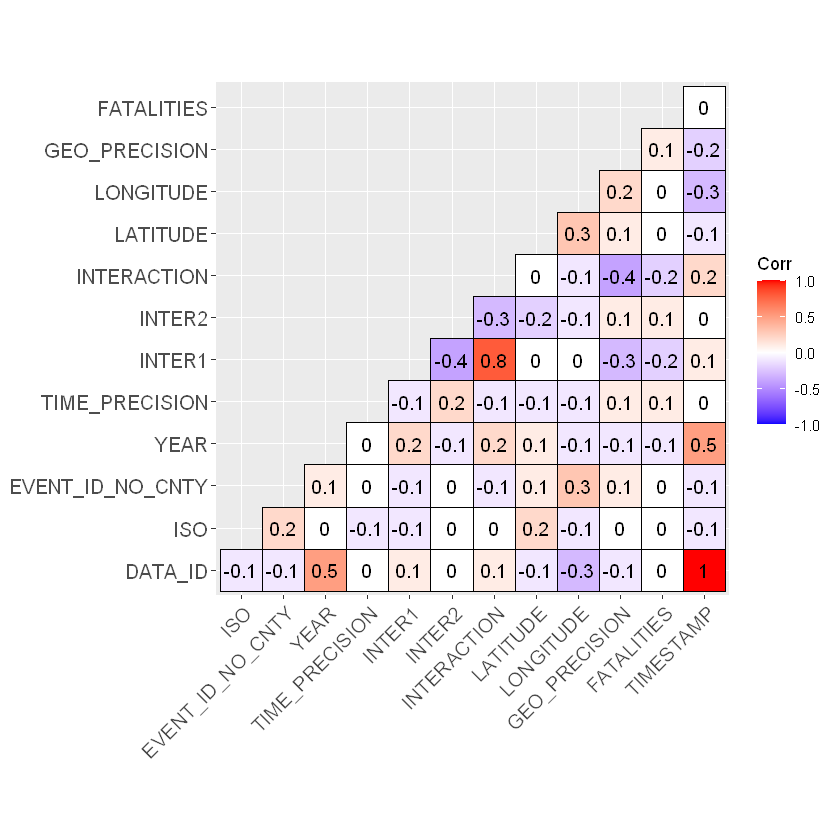

In [19]:
#GGCORRPLOT: heatmap of significance or lack thereof


ggcorrplot(df_corr, type = "lower", outline.col = "black", lab = TRUE,
          ggtheme = ggplot2::theme_gray,
          colors = c("blue", "white", "red"))

<H1><font color = blue> STILL WORKING CLUSTERING<BR>   
<h3> Better ways to prep data<br>
    Spatial Clustering
    

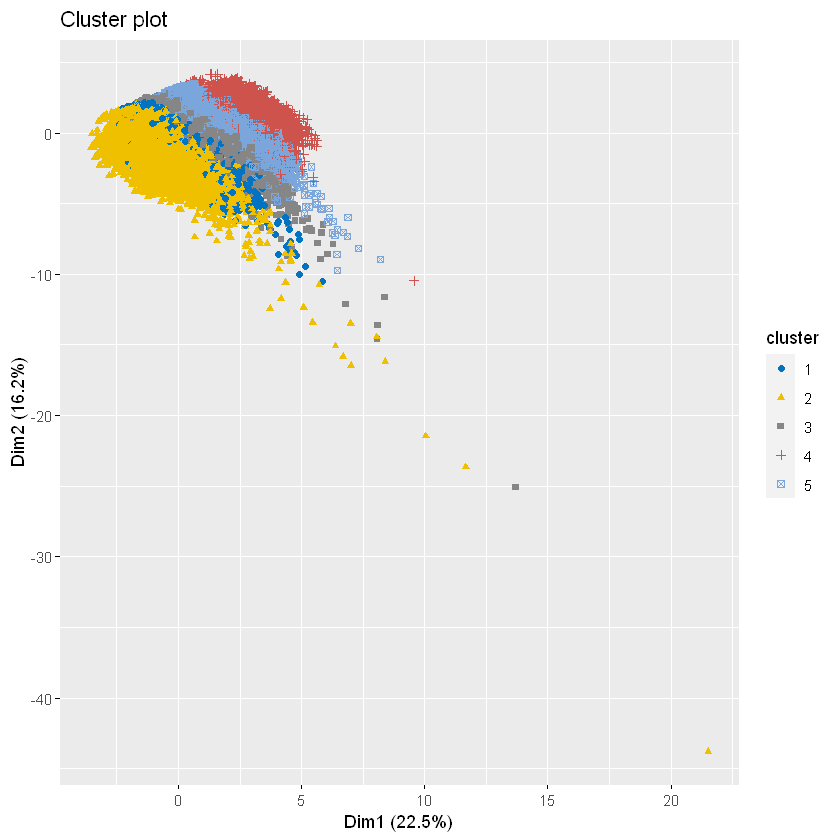

In [20]:
km.df <- kmeans (df_numeric, 5, nstart = 25)
fviz_cluster(km.df, df_numeric, geom = "point",
            ellipse=FALSE, show.clust.cent=FALSE,
            palette="jco", gghteme=theme_classic())

In [ ]:
set.seed(123)
dfdb <- fpc::dbscan(df_numeric, eps=0.15, MinPts=5)

fviz_cluster(dfdb, data = df_numeric, stand=FALSE,
            ellipse=FALSE, show.clust.cent=FALSE,
            geom="point", pallette="jco", gghteme=theme_classic())

In [ ]:
#DELETE MISSING DATA
df_no_na <- na.omit(df_numeric)     # listwise deletion of missing
df_no_na_scale <- scale(df_no_na)     # standardize variables